# Data Visualization

This notebook serves to visualize the input data to be used when comparing GNN-SubNet with the modified version.

## Synthetic Dataset


### FEATURES_synthetic
This file contains the feature values of all of the nodes in the graph to be analysed. The rows correspond to a feature value and the columns correspond to the feature values for a certain node.

In [2]:
import pandas as pd
import networkx as nx           # used for graph creation
import matplotlib.pyplot as plt # used for graph visualization
import GNNSubNet.dataset as ds  # used for preprocessing the dataset
import torch_geometric

path_to_features = "GNNSubNet/datasets/synthetic/FEATURES_synthetic.txt"

features = pd.read_csv(path_to_features, sep = ' ', header = None, names = [f'N{i}' for i in range(1, 31)], skiprows = [0])

features

,N1,N2,N3,N4,N5,N6,N7,N8,N9,N10,...,N21,N22,N23,N24,N25,N26,N27,N28,N29,N30
1,-0.225565,-0.079435,-1.038912,-0.064463,-0.092766,-0.104381,-1.038912,0.004020,0.032829,-0.144827,...,-0.074962,-0.129287,-0.032765,0.043832,-0.062105,0.118644,0.094713,-0.062300,-0.062096,-0.064673
2,0.136863,-0.000456,-1.105148,-0.155878,0.056413,0.096215,-1.105148,0.021709,-0.173163,-0.089744,...,-0.053899,0.057939,-0.192912,0.028956,0.096376,-0.070708,0.139840,-0.024295,-0.071749,0.060706
3,0.048810,-0.080005,-0.840446,-0.146166,0.166137,0.044194,-0.840446,0.043157,-0.019946,0.028688,...,0.086764,-0.092636,0.109527,0.141949,-0.007768,-0.121280,0.009166,-0.099991,-0.129770,-0.032993
4,0.132162,0.198634,-1.004599,-0.041246,-0.058439,-0.056906,-1.004599,0.105518,0.148933,-0.136897,...,-0.013821,-0.091395,0.023719,0.173825,-0.004336,-0.033561,-0.097016,-0.070303,0.074342,0.022198
5,0.187705,-0.106121,-0.966577,-0.085734,-0.086479,0.045524,-0.966577,-0.059985,-0.100718,-0.048775,...,0.080521,0.042664,-0.065434,0.043459,0.138565,-0.037326,0.155516,0.102295,0.021734,0.077345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,-0.001098,-0.020689,0.967796,0.108221,-0.076779,0.023927,0.967796,-0.093213,-0.058992,0.082350,...,0.017965,0.044567,-0.002156,-0.082033,-0.069960,0.076321,0.018774,-0.135816,0.044986,-0.075782
997,-0.082916,0.143558,1.044388,-0.014464,0.117274,-0.057685,1.044388,-0.042430,0.058956,-0.157850,...,0.042596,0.056340,0.313336,-0.237531,-0.000180,0.032494,-0.178465,-0.048864,-0.075704,0.061444
998,-0.003674,0.026251,1.023055,-0.114240,-0.014216,0.177771,1.023055,-0.004193,0.094364,-0.114074,...,-0.044071,0.005507,0.051802,0.107534,-0.033641,0.100321,-0.046410,0.041428,-0.029655,-0.073846
999,0.020201,-0.029271,0.828976,0.003155,0.176174,-0.132827,0.828976,-0.031011,0.086800,0.086351,...,0.040111,0.039891,-0.023968,0.101275,0.059573,0.086177,-0.255192,0.121961,0.062528,0.072322


As indicated by the table, the dataset contains 30 nodes. This cell plots the feature values for a single node. The node to be plotted can be changed below.

<Axes: title={'center': 'Features for multiple nodes'}, ylabel='Density'>

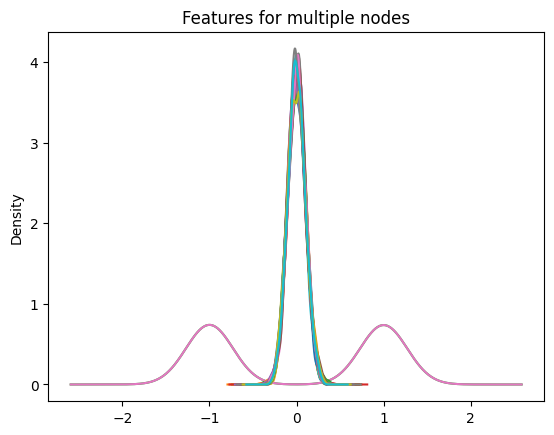

In [12]:
node = features.iloc[:, :]

plot = node.plot(title = 'Features for multiple nodes', kind = 'density', legend = False)

plot

_"Node feature values were generated using a normal distribution with N(mean = 0, var.). Following, we randomly sampled two connected nodes for which we assigned feature values from N(mean = -1, var.) for one half of the networks, and values from N(mean = 1, var.) for the rest."_ (Pfeifer et al., 2022)

In [75]:
node.describe()

count    1000.000000
mean        0.001407
std         0.098572
min        -0.314753
25%        -0.061726
50%         0.003216
75%         0.068257
max         0.303087
Name: N15, dtype: float64

### NETWORK_synthetic

This dataset contains the edges between the nodes of the graph for which the features are analysed.

In [13]:
path_to_network = "GNNSubNet/datasets/synthetic/NETWORK_synthetic.txt"

network = pd.read_csv(path_to_network, sep = ' ', header = None, names = ["Node1", "Node2", "combined_score"], skiprows = [0])

network

,Node1,Node2,combined_score
1,N1,N2,999
2,N2,N3,999
3,N2,N4,999
4,N2,N5,999
5,N1,N6,999
6,N3,N7,999
7,N4,N8,999
8,N2,N9,999
9,N1,N10,999
10,N4,N11,999


The following cells create and display a graph containing the edges specified in the synthetic dataset.

In [14]:
# Create a graph from the network dataframe
G = nx.Graph()

G.add_nodes_from(network['Node1'])
G.add_nodes_from(network['Node2'])

edges = [(row['Node1'], row['Node2']) for index, row in network.iterrows()]

G.add_edges_from(edges)

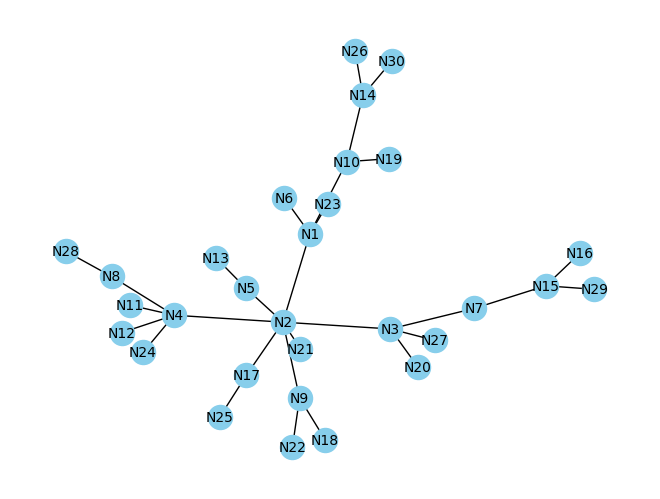

In [15]:
# Draw the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=300, node_color='skyblue', font_size=10, font_color='black')
# Display the graph
plt.show()

### Processed data

The cells below run a pre-processing method on the synthetic data, then visualise it.

In [110]:
path_to_features2 = "GNNSubNet/datasets/synthetic/FEATURES_synthetic.txt"
path_to_network2 = "GNNSubNet/datasets/synthetic/NETWORK_synthetic.txt"
path_to_target = "GNNSubNet/datasets/synthetic/TARGET_synthetic.txt"

graphs, gene_values = ds.load_OMICS_dataset(path_to_network2, [path_to_features2], path_to_target)

graphs

[Data(x=[30, 1], edge_index=[2, 29], y=0),
 Data(x=[30, 1], edge_index=[2, 29], y=0),
 Data(x=[30, 1], edge_index=[2, 29], y=0),
 Data(x=[30, 1], edge_index=[2, 29], y=0),
 Data(x=[30, 1], edge_index=[2, 29], y=0),
 Data(x=[30, 1], edge_index=[2, 29], y=0),
 Data(x=[30, 1], edge_index=[2, 29], y=0),
 Data(x=[30, 1], edge_index=[2, 29], y=0),
 Data(x=[30, 1], edge_index=[2, 29], y=0),
 Data(x=[30, 1], edge_index=[2, 29], y=0),
 Data(x=[30, 1], edge_index=[2, 29], y=0),
 Data(x=[30, 1], edge_index=[2, 29], y=0),
 Data(x=[30, 1], edge_index=[2, 29], y=0),
 Data(x=[30, 1], edge_index=[2, 29], y=0),
 Data(x=[30, 1], edge_index=[2, 29], y=0),
 Data(x=[30, 1], edge_index=[2, 29], y=0),
 Data(x=[30, 1], edge_index=[2, 29], y=0),
 Data(x=[30, 1], edge_index=[2, 29], y=0),
 Data(x=[30, 1], edge_index=[2, 29], y=0),
 Data(x=[30, 1], edge_index=[2, 29], y=0),
 Data(x=[30, 1], edge_index=[2, 29], y=0),
 Data(x=[30, 1], edge_index=[2, 29], y=0),
 Data(x=[30, 1], edge_index=[2, 29], y=0),
 Data(x=[30

All graphs are equal. This confirms the statement in the paper that they have the same topology.

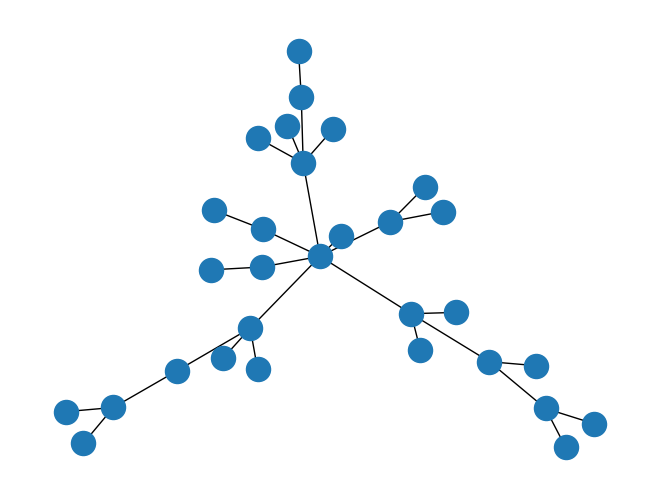

In [106]:
g = torch_geometric.utils.to_networkx(graphs[0], to_undirected=True)
nx.draw(g)

## TCGA dataset

This dataset is a real-world multi-omics dataset derived from The Cancer Genome Atlas. The files visualized below contain data used in analysing Kidney Renal Cell Carcinoma (KIRC).

### KIDNEY_RANDOM_Methy_FEATURES.txt

In [16]:
kidney_random_methy_path = "TCGA/KIDNEY_RANDOM_Methy_FEATURES.txt"

kidney_methy_features = pd.read_csv(kidney_random_methy_path, sep = ' ')

kidney_methy_features

,ACTN1,ATP2A1,MAN1B1,NPHP4,MAEL,PROX1,NR5A2,ETV6,COL6A3,SLMAP,...,KIF18A,STX19,CSTF2T,MRC1,TRIM32,STON1,GTF3C4,OGN,ECM2,POU5F2
TCGA.3Z.A93Z,-0.0063,-0.4851,-0.4896,0.3768,0.3686,0.4394,0.3762,0.2232,0.4286,-0.2660,...,-0.3574,-0.0221,-0.2521,0.3795,-0.4882,0.2572,0.2910,0.3161,0.2704,0.0270
TCGA.6D.AA2E,0.1481,-0.4799,-0.4882,0.4153,0.3911,0.4277,0.4272,0.2435,0.3580,-0.1912,...,-0.4492,0.1014,NaN,0.4406,-0.4862,0.4077,0.3460,0.3105,0.4484,0.3682
TCGA.A3.3357,-0.0540,-0.4859,-0.4913,0.4520,0.2489,0.2177,0.4246,0.3026,0.4149,-0.2734,...,-0.3726,0.1299,-0.3404,0.3322,-0.4807,0.4417,0.4172,0.3356,0.4349,0.3700
TCGA.A3.3358,-0.1005,-0.4778,-0.4869,0.4336,0.0612,0.4032,0.4249,0.1463,0.3638,-0.2886,...,-0.4391,0.3571,-0.4185,0.4406,-0.4827,0.4041,0.0591,0.4012,0.4195,0.3517
TCGA.A3.3367,-0.0493,-0.4830,-0.4926,0.4449,0.3904,0.4525,0.4417,0.2842,0.3929,-0.3218,...,-0.4569,0.2291,-0.3374,0.4197,-0.4860,0.4455,0.1714,0.4007,0.3509,0.3725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA.B0.57051,0.1844,-0.4682,-0.4881,0.4306,0.2313,0.3250,0.2869,0.2316,0.3853,-0.3627,...,-0.4661,0.4173,-0.4407,0.3603,-0.4776,0.1845,0.3513,0.3512,0.3157,0.3569
TCGA.A2.A0YD,0.1797,0.3954,0.4284,-0.4256,0.4757,-0.3728,0.1954,-0.3860,0.2750,-0.3576,...,-0.4852,0.4197,-0.4680,0.3914,-0.4841,0.3976,0.3133,0.4202,0.3146,0.4564
TCGA.E2.A1IE,0.1866,0.3494,0.4185,-0.4021,0.4761,0.1640,0.2346,-0.3248,0.3250,-0.4152,...,-0.4883,0.3885,-0.4658,0.3997,-0.4832,0.3770,-0.1065,0.3951,-0.0738,0.4256
TCGA.BH.A0W4,0.2026,0.4024,0.4467,-0.4280,0.4790,-0.2240,0.0902,-0.3583,0.3022,-0.4200,...,-0.4873,0.4238,-0.4709,0.1710,-0.4861,0.3985,-0.1006,0.4233,0.0852,0.4515


<Axes: ylabel='Density'>

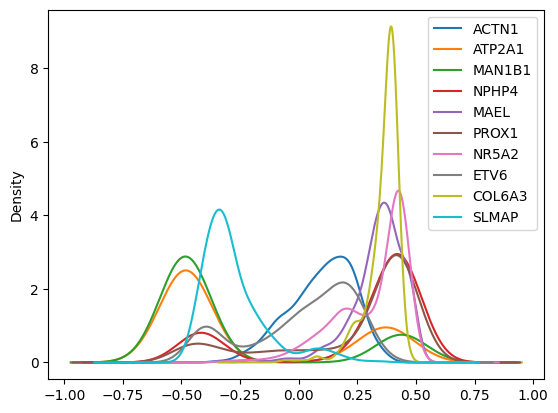

In [18]:
protein = kidney_methy_features.iloc[:, 0:10]

plot = protein.plot(kind = 'density')

plot

As opposed to the synthetic dataset, in which most nodes' density plots reach a single peak around 0.0, TCGA contains much more various data. For example, the PTPRF protein has a mean of 0.17, whereas AARs has a mean of -0.41.

In [19]:
protein.describe()

,ACTN1,ATP2A1,MAN1B1,NPHP4,MAEL,PROX1,NR5A2,ETV6,COL6A3,SLMAP
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,0.098408,-0.231112,-0.291127,0.239968,0.338500,0.234171,0.313944,0.012618,0.359537,-0.274509
std,0.136259,0.389047,0.373866,0.336123,0.115696,0.305739,0.151868,0.231237,0.072721,0.142951
min,-0.348800,-0.489900,-0.493700,-0.456000,-0.345100,-0.486600,-0.326400,-0.448700,-0.070000,-0.461100
25%,0.008275,-0.484500,-0.490700,0.293900,0.294725,0.119525,0.207300,-0.127975,0.338750,-0.366875
50%,0.117700,-0.480900,-0.488500,0.419100,0.356450,0.402350,0.392900,0.071100,0.383150,-0.312450
75%,0.204700,0.310500,-0.425275,0.437675,0.408500,0.434950,0.431475,0.199500,0.403100,-0.229125
max,0.373000,0.470600,0.464100,0.467300,0.487300,0.465900,0.460000,0.401600,0.477100,0.359200


## KIDNEY_RANDOM_mRNA_FEATURES.txt

In [20]:
kidney_random_mrna_path = "TCGA/KIDNEY_RANDOM_mRNA_FEATURES.txt"

kidney_mrna_features = pd.read_csv(kidney_random_methy_path, sep = ' ')

kidney_mrna_features

,ACTN1,ATP2A1,MAN1B1,NPHP4,MAEL,PROX1,NR5A2,ETV6,COL6A3,SLMAP,...,KIF18A,STX19,CSTF2T,MRC1,TRIM32,STON1,GTF3C4,OGN,ECM2,POU5F2
TCGA.3Z.A93Z,-0.0063,-0.4851,-0.4896,0.3768,0.3686,0.4394,0.3762,0.2232,0.4286,-0.2660,...,-0.3574,-0.0221,-0.2521,0.3795,-0.4882,0.2572,0.2910,0.3161,0.2704,0.0270
TCGA.6D.AA2E,0.1481,-0.4799,-0.4882,0.4153,0.3911,0.4277,0.4272,0.2435,0.3580,-0.1912,...,-0.4492,0.1014,NaN,0.4406,-0.4862,0.4077,0.3460,0.3105,0.4484,0.3682
TCGA.A3.3357,-0.0540,-0.4859,-0.4913,0.4520,0.2489,0.2177,0.4246,0.3026,0.4149,-0.2734,...,-0.3726,0.1299,-0.3404,0.3322,-0.4807,0.4417,0.4172,0.3356,0.4349,0.3700
TCGA.A3.3358,-0.1005,-0.4778,-0.4869,0.4336,0.0612,0.4032,0.4249,0.1463,0.3638,-0.2886,...,-0.4391,0.3571,-0.4185,0.4406,-0.4827,0.4041,0.0591,0.4012,0.4195,0.3517
TCGA.A3.3367,-0.0493,-0.4830,-0.4926,0.4449,0.3904,0.4525,0.4417,0.2842,0.3929,-0.3218,...,-0.4569,0.2291,-0.3374,0.4197,-0.4860,0.4455,0.1714,0.4007,0.3509,0.3725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA.B0.57051,0.1844,-0.4682,-0.4881,0.4306,0.2313,0.3250,0.2869,0.2316,0.3853,-0.3627,...,-0.4661,0.4173,-0.4407,0.3603,-0.4776,0.1845,0.3513,0.3512,0.3157,0.3569
TCGA.A2.A0YD,0.1797,0.3954,0.4284,-0.4256,0.4757,-0.3728,0.1954,-0.3860,0.2750,-0.3576,...,-0.4852,0.4197,-0.4680,0.3914,-0.4841,0.3976,0.3133,0.4202,0.3146,0.4564
TCGA.E2.A1IE,0.1866,0.3494,0.4185,-0.4021,0.4761,0.1640,0.2346,-0.3248,0.3250,-0.4152,...,-0.4883,0.3885,-0.4658,0.3997,-0.4832,0.3770,-0.1065,0.3951,-0.0738,0.4256
TCGA.BH.A0W4,0.2026,0.4024,0.4467,-0.4280,0.4790,-0.2240,0.0902,-0.3583,0.3022,-0.4200,...,-0.4873,0.4238,-0.4709,0.1710,-0.4861,0.3985,-0.1006,0.4233,0.0852,0.4515


In [21]:
kidney_mrna_features.equals(kidney_methy_features)

True

The two datasets are equal. If the algorithm is to be run on single-omics data, the methylome dataset is to be used (kidney_methy_features). However, if the algorithm is to be run on multi-modal data, both datasets should be used.

## KIDNEY_RANDOM_PPI

In [22]:
# load the PPI dataset which indicates the edges of the graph to run the GNN on
path_to_PPI = "TCGA/KIDNEY_RANDOM_PPI.txt"

network = pd.read_csv(path_to_PPI, sep = ' ')

network

,protein1,protein2,combined_score
4719,FUCA2,MPO,902
4721,FUCA2,HSP90B1,906
4723,FUCA2,C1GALT1,227
4725,FUCA2,GEMIN4,221
4728,FUCA2,DSN1,900
...,...,...,...
11759241,EIF3L,DHX15,201
11759246,EIF3L,CFH,166
11759247,EIF3L,RPL3L,916
11759253,EIF3L,NMT1,244


In [23]:
network.combined_score.describe()

count    1.382582e+06
mean     2.942589e+02
std      1.945216e+02
min      1.500000e+02
25%      1.770000e+02
50%      2.180000e+02
75%      3.150000e+02
max      9.990000e+02
Name: combined_score, dtype: float64

This dataset contains a very large number of proteins. As such, the generated graph would be infeasible to visualize.

## Processed data

The cell below processes the KIRC-related data and displays it.

In [27]:
import torch_geometric.utils as T

path_to_kidney_target = "TCGA/KIDNEY_RANDOM_TARGET.txt"

graphs, gene_values = ds.load_OMICS_dataset(path_to_PPI, [kidney_random_methy_path, kidney_random_mrna_path], path_to_kidney_target)

# Your torch_geometric.data.Data object
data = graphs[0]

# Convert to NetworkX graph
graph = T.to_networkx(data)

graph.edges


OutEdgeView([(0, 137), (0, 141), (0, 403), (0, 731), (0, 737), (0, 751), (0, 948), (0, 1136), (0, 1293), (0, 1897), (0, 1901), (0, 2258), (1, 928), (2, 509), (2, 659), (2, 711), (2, 970), (2, 1239), (2, 1733), (2, 1850), (2, 2295), (3, 659), (4, 777), (4, 778), (4, 825), (5, 137), (5, 1448), (5, 1648), (6, 2138), (7, 1449), (8, 1091), (8, 1753), (9, 1091), (10, 340), (10, 625), (12, 13), (12, 163), (12, 491), (12, 492), (12, 571), (12, 617), (12, 1378), (12, 1379), (12, 1973), (12, 2260), (12, 2261), (12, 2262), (12, 2263), (13, 12), (13, 178), (13, 198), (13, 225), (13, 238), (13, 269), (13, 355), (13, 642), (13, 751), (13, 1259), (13, 1609), (13, 1762), (13, 1795), (13, 1810), (13, 1973), (13, 2024), (13, 2076), (13, 2260), (13, 2261), (13, 2262), (14, 673), (15, 21), (15, 712), (15, 925), (15, 1678), (16, 21), (16, 712), (16, 925), (17, 1390), (17, 1391), (17, 1392), (18, 49), (18, 52), (18, 445), (18, 1293), (18, 1294), (18, 1675), (18, 1975), (18, 2118), (18, 2127), (19, 75), (19,

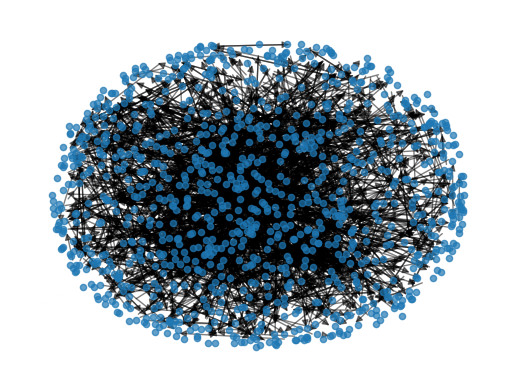

In [36]:
# Apply spring layout with reduced node size and edge filtering
pos = nx.spring_layout(graph, k=0.3)  # Adjust k for better spacing
nx.draw_networkx_nodes(graph, pos, nodelist=list(graph.nodes)[0:1000:None], node_size=20, alpha=0.7)  # Adjust size and transparency

# Filter and draw edges with a weight threshold (optional)
filtered_edges = list(graph.edges)[0:3000:None]
nx.draw_networkx_edges(graph, pos, edgelist=filtered_edges, alpha=0.5)

plt.axis('off')
plt.show()